<a href="https://colab.research.google.com/github/Kartik77/MNIST-CNN/blob/master/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import seaborn as sns

In [0]:
N =50
noise = 0.3

X_train = torch.unsqueeze(torch.linspace(-1, 1, N) ,1)
Y_train = X_train + noise* torch.normal(torch.zeros(N,1), torch.ones(N,1))

X_test = torch.unsqueeze(torch.linspace(-1,1,N) ,1)
Y_test = X_test + noise* torch.normal(torch.zeros(N,1), torch.ones(N,1))

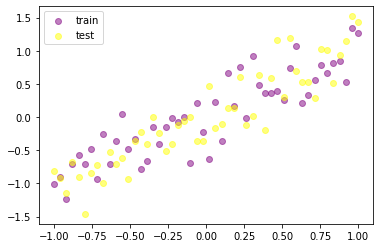

In [10]:
plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
plt.legend()
plt.show()

In [0]:
N_h = 100

model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,1)
)

model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,1)
)

In [0]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

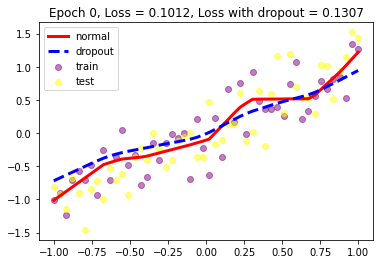

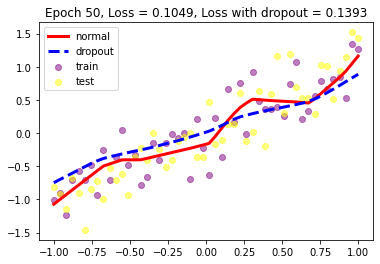

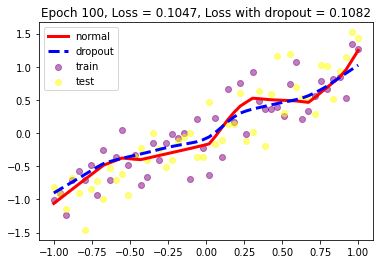

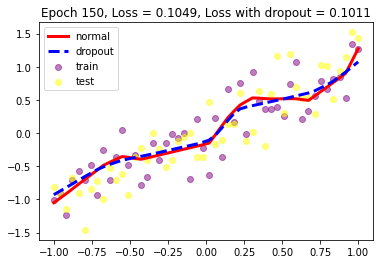

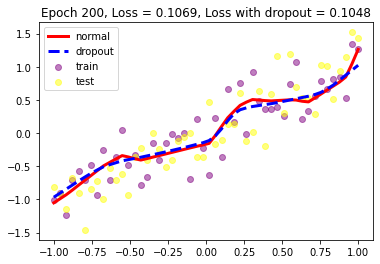

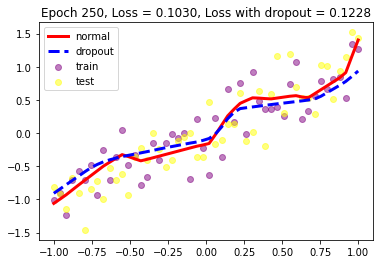

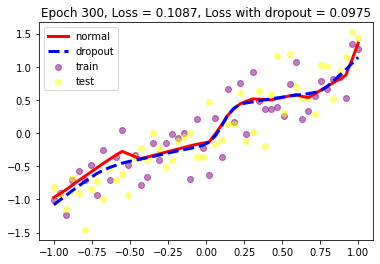

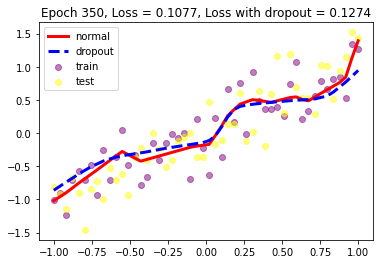

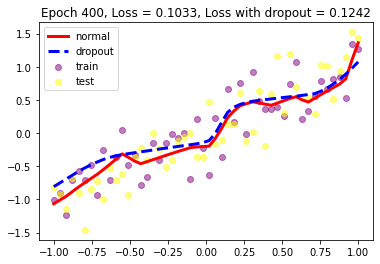

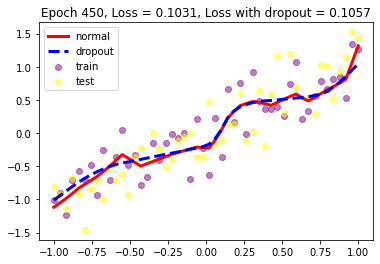

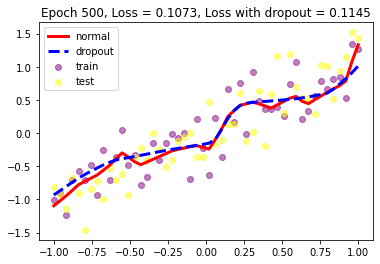

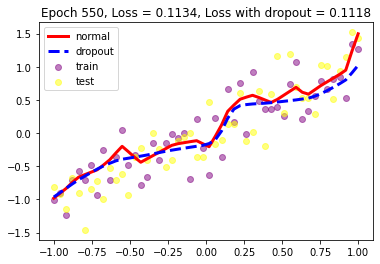

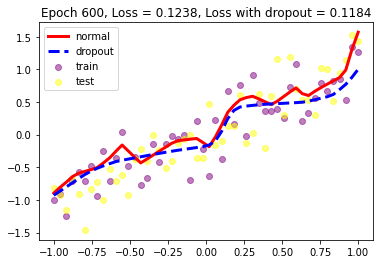

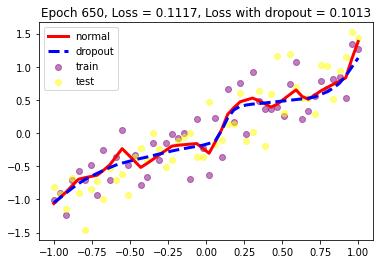

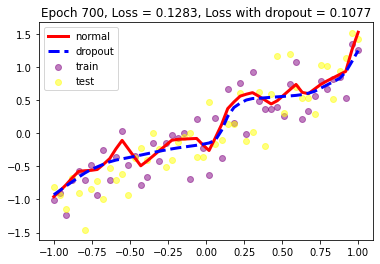

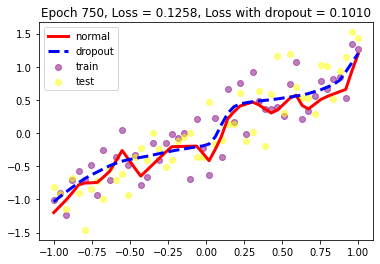

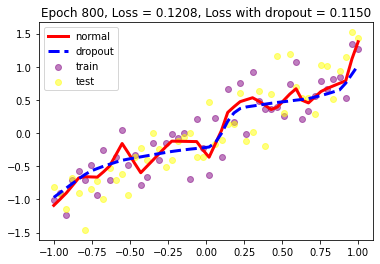

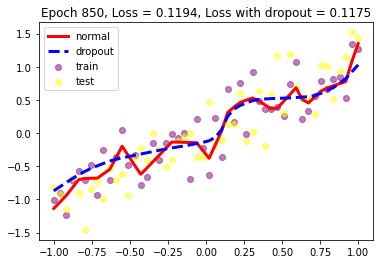

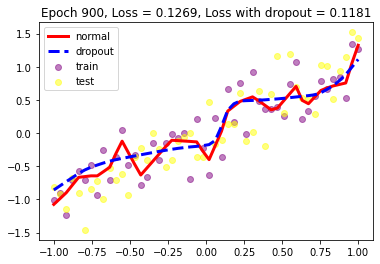

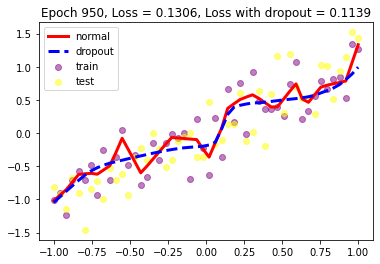

In [19]:
max_epochs = 1000

for epoch in range(max_epochs):
  pred = model(X_train)
  loss = loss_fn(pred, Y_train)
  opt.zero_grad()
  loss.backward()
  opt.step()

  pred_dropout = model_dropout(X_train)
  loss_dropout = loss_fn(pred_dropout, Y_train)
  opt_dropout.zero_grad()
  loss_dropout.backward()
  opt_dropout.step()

  if epoch % 50 == 0:

    model.eval()
    model_dropout.eval()

    test_pred = model(X_test)
    test_loss= loss_fn(test_pred, Y_test)

    test_pred_dropout = model_dropout(X_test)
    test_loss_dropout= loss_fn(test_pred_dropout, Y_test)

    plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
    plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
    plt.plot(X_test.data.numpy(), test_pred.data.numpy(), 'r-', lw=3, label='normal')
    plt.plot(X_test.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3, label='dropout')

    plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))

    plt.legend()

    model.train()
    model_dropout.train()

    plt.pause(0.05)